### C.Dados Projeto 1
**Análise Exploratória**

Após o meu feedback da APS-1 resolvi abordar outra questão, pois o Acordo de Paris (COP21) e Protocolo de Kyoto contam como tratados internacionais e não como organizações, tendo isso em vista optei por abordar a OPEC *(Organization of Petroleum Exporting Countries)* ![](bandeiraOpec.png)

"OPEC often has difficulty agreeing on policy decisions because its member countries differ widely in their oil export capacities, production costs, reserves, geological features, population, economic development, budgetary situations, and political circumstances. Indeed, over the course of market cycles, oil reserves can themselves become a source of serious conflict, instability and imbalances, in what economists call the "natural resource curse""

Fonte: https://en.wikipedia.org/wiki/OPEC

Como mencionado na célula anterior existem grandes dissiparidades entre os países membros da OPEC, tendo isso em vista gostaria de responder à seguinte questões:

- O Produto Interno Bruto dos Países cresceu após o ingresso na OPEP?
- O Produto Interno Bruto dependente da Exportação Subiu? (Preferencialmente seria "Exportação de Petórleo", mas não encontrei dados para essa análise)
- Houve alguma excessão?

Motivo da pergunta: Dissiparidade Economica entre os membros, observando como exemplos a Venezuela, que bate recordes de inflação (53,798,500%) e os Emirados Arabes Unidos que mantém esse indice abaixo de 2%

## Hipótese:
Sim, o PIB desses países em geral cresceu, e a contribuição da Exportação pro PIB permaneceu constnte na maioria dos casos, no entanto hoveram excessões, como é o caso da Venezuela

In [66]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [67]:
Oil_Production= pd.read_excel("Oil Production.xlsx")
TotalofGDP= pd.read_excel("indicator GDP at market prices, constant 2000 US$ (WB estimates).xlsx")
ExportPofGDP= pd.read_excel("Exports (p of GDP).xlsx")

In [68]:
opec =["Algeria", "Angola", "Ecuador", "Equatorial Guinea", "Gabon", "Iran", "Iraq",
      "Kuwait", "Libya", "Nigeria", "Congo, Rep.", "Saudi Arabia",
      "United Arab Emirates","Venezuela","Indonesia", "Qatar"]

In [69]:
Oil_Production_idx= Oil_Production.set_index("Crude oil production, total (toe)")
Oil_Production_idx.loc[:,"OPEC"]= 0
Oil_Production_idx.loc[opec,"OPEC"]= 1
OP=Oil_Production_idx[(Oil_Production_idx.OPEC)==1]
OP.columns = OP.columns.map(lambda x: str(x))

In [70]:
TotalofGDP_idx= TotalofGDP.set_index("GDP (constant 2000 US$)")
TotalofGDP_idx.loc[:,"OPEC"]= 0
TotalofGDP_idx.loc[opec,"OPEC"]= 1
TGDP=TotalofGDP_idx[(TotalofGDP_idx.OPEC)==1]
TGDP.columns = TGDP.columns.map(lambda x: str(x))

In [71]:
ExportPofGDP_idx=ExportPofGDP.set_index("Exports of goods and services (% of GDP)")
ExportPofGDP_idx.loc[:,"OPEC"]= 0
ExportPofGDP_idx.loc[opec,"OPEC"]= 1
EGDP=ExportPofGDP_idx[(ExportPofGDP_idx.OPEC)==1]
EGDP.columns = EGDP.columns.map(lambda x: str(x))

In [72]:
df = OP.join(EGDP, how='inner', lsuffix='Production', rsuffix='Export').join(TGDP, how='inner', rsuffix='TotalGDP')
df.index.names = ['Membros da OPEC']

Para fazer essa análise e responder ás perguntas, resolvi estudar a OPEC de 5 em 5 anos, um periodo aceitável, visto que foi numa variação próxima a essa que países entravam ou saiam da Organização

### 1965: Iran, Iraq, Kuwait, Lybia, Saudi Arabia, Venezuela.

In [73]:
tab1965=df.loc[:, ["1965Production", "1965Export","1965"]]
tab1965.columns= ['Production','Export%ofGDP','Total GDP']
tab1965

,Production,Export%ofGDP,Total GDP
Membros da OPEC,,,
Algeria,2.648100e+07,22.603944,1.448664e+10
Angola,6.550000e+05,NaN,NaN
"Congo, Rep.",7.100000e+04,36.008223,7.373708e+08
Ecuador,4.287812e+05,16.248990,4.467235e+09
Equatorial Guinea,NaN,42.111766,NaN
Gabon,1.265000e+06,43.243243,1.314837e+09
Indonesia,2.453527e+07,5.527578,2.036364e+10
Iran,9.566209e+07,16.279815,2.418788e+10
Iraq,6.467544e+07,NaN,NaN


### 1970:(Entrada da Algeria, e dos Emirados Arabes Unidos) Algeria, Iran, Iraq, Kuwait, Lybia, Saudi Arabia, United Arab Emirates, Venezuela.

In [74]:
tab1970=df.loc[:, ["1970Production", "1970Export","1970"]]
tab1970.columns= ['Production','Export%ofGDP','Total GDP']
tab1970

,Production,Export%ofGDP,Total GDP
Membros da OPEC,,,
Algeria,4.820800e+07,22.072734,1.974131e+10
Angola,5.065000e+06,NaN,NaN
"Congo, Rep.",NaN,34.736829,9.396332e+08
Ecuador,2.143906e+05,15.232975,5.544774e+09
Equatorial Guinea,NaN,35.699518,NaN
Gabon,5.423000e+06,49.720659,1.722664e+09
Indonesia,4.311342e+07,13.451007,2.758180e+10
Iran,1.925870e+08,19.163515,4.122475e+10
Iraq,7.630027e+07,NaN,NaN


### 1975: (Entrada do Ecuador, da Nigeria e de Gabon) Algeria, Ecuador, Gabon, Iran, Iraq, Kuwait, Lybia, Nigeria, Saudi Arabia, United Arab Emirates, Venezuela.

In [75]:
tab1975=df.loc[:, ["1975Production", "1975Export","1975"]]
tab1975.columns= ['Production','Export%ofGDP','Total GDP']
tab1975

,Production,Export%ofGDP,Total GDP
Membros da OPEC,,,
Algeria,4.575400e+07,33.688936,2.614644e+10
Angola,7.791000e+06,NaN,NaN
"Congo, Rep.",1.789000e+06,35.888078,1.383396e+09
Ecuador,8.629222e+06,25.962574,8.418212e+09
Equatorial Guinea,NaN,42.980976,NaN
Gabon,1.131500e+07,49.524221,3.873822e+09
Indonesia,6.593223e+07,24.008846,4.017610e+10
Iran,2.694699e+08,43.141909,6.612053e+10
Iraq,1.117031e+08,NaN,NaN


### 1980: Algeria, Ecuador, Gabon, Iran, Iraq, Kuwait, Lybia, Nigeria, Saudi Arabia, United Arab Emirates, Venezuela.

In [76]:
tab1980=df.loc[:, ["1980Production", "1980Export","1980"]]
tab1980.columns= ['Production','Export%ofGDP','Total GDP']
tab1980

,Production,Export%ofGDP,Total GDP
Membros da OPEC,,,
Algeria,5.175000e+07,34.338461,3.529123e+10
Angola,7.428000e+06,NaN,NaN
"Congo, Rep.",3.168000e+06,60.016648,1.746409e+09
Ecuador,1.102698e+07,24.951660,1.088244e+10
Equatorial Guinea,NaN,NaN,NaN
Gabon,8.895000e+06,64.720195,3.594320e+09
Indonesia,7.903508e+07,34.178997,5.882127e+10
Iran,7.415802e+07,14.410976,5.728671e+10
Iraq,1.310731e+08,NaN,NaN


### 1985: Algeria, Ecuador, Gabon, Iran, Iraq, Kuwait, Lybia, Nigeria, Saudi Arabia, United Arab Emirates, Venezuela.

In [77]:
tab1985=df.loc[:, ["1985Production", "1985Export","1985"]]
tab1985.columns= ['Production','Export%ofGDP','Total GDP']
tab1985

,Production,Export%ofGDP,Total GDP
Membros da OPEC,,,
Algeria,4.999700e+07,23.583933,4.464049e+10
Angola,1.145200e+07,35.719735,7.218738e+09
"Congo, Rep.",5.937000e+06,56.788216,2.840863e+09
Ecuador,1.522330e+07,28.491762,1.164983e+10
Equatorial Guinea,NaN,30.093473,1.942937e+08
Gabon,8.626000e+06,62.572476,4.059059e+09
Indonesia,6.633980e+07,22.200731,7.735343e+10
Iran,1.103511e+08,9.388897,6.939679e+10
Iraq,6.983889e+07,NaN,NaN


### 1990: Algeria, Ecuador, Gabon, Iran, Iraq, Kuwait, Lybia, Nigeria, Saudi Arabia, United Arab Emirates, Venezuela.

In [78]:
tab1990=df.loc[:, ["1990Production", "1990Export","1990"]]
tab1990.columns= ['Production','Export%ofGDP','Total GDP']
tab1990

,Production,Export%ofGDP,Total GDP
Membros da OPEC,,,
Algeria,5.747700e+07,23.443685,4.636691e+10
Angola,2.338000e+07,38.912521,8.463863e+09
"Congo, Rep.",8.029000e+06,53.680247,2.795588e+09
Ecuador,1.552276e+07,32.982323,1.333067e+10
Equatorial Guinea,NaN,32.152448,2.074998e+08
Gabon,1.349300e+07,46.038504,4.298461e+09
Indonesia,7.443352e+07,25.328513,1.091505e+11
Iran,1.627889e+08,14.523923,7.029376e+10
Iraq,1.053009e+08,NaN,NaN


### 1995: (Saída do Ecuador e de Gabon) Algeria, Iran, Iraq, Kuwait, Lybia, Nigeria, Saudi Arabia, United Arab Emirates, Venezuela.

In [79]:
tab1995=df.loc[:, ["1995Production", "1995Export","1995"]]
tab1995.columns= ['Production','Export%ofGDP','Total GDP']
tab1995

,Production,Export%ofGDP,Total GDP
Membros da OPEC,,,
Algeria,5.659600e+07,26.194776,4.696416e+10
Angola,3.117300e+07,NaN,6.698532e+09
"Congo, Rep.",9.267000e+06,64.704570,2.857728e+09
Ecuador,2.099905e+07,25.727868,1.521061e+10
Equatorial Guinea,3.466757e+05,55.204200,2.899155e+08
Gabon,1.775600e+07,59.386999,5.002313e+09
Indonesia,7.645456e+07,26.312165,1.593827e+11
Iran,1.854565e+08,21.708551,8.307323e+10
Iraq,2.602632e+07,NaN,NaN


### 2000: Algeria, Iran, Iraq, Kuwait, Lybia, Nigeria, Saudi Arabia, United Arab Emirates, Venezuela.

In [80]:
tab2000=df.loc[:, ["2000Production", "2000Export","2000"]]
tab2000.columns= ['Production','Export%ofGDP','Total GDP']
tab2000

,Production,Export%ofGDP,Total GDP
Membros da OPEC,,,
Algeria,6.678700e+07,41.175353,5.479006e+10
Angola,3.685000e+07,89.626206,9.129180e+09
"Congo, Rep.",1.313873e+07,80.297147,3.219894e+09
Ecuador,2.178681e+07,37.065394,1.594164e+10
Equatorial Guinea,4.519132e+06,99.455867,1.254223e+09
Gabon,1.637500e+07,69.032177,5.067839e+09
Indonesia,7.146999e+07,40.977309,1.650210e+11
Iran,1.911405e+08,22.707458,1.012865e+11
Iraq,1.288203e+08,NaN,2.585711e+10


### 2005: Algeria, Iran, Iraq, Kuwait, Lybia, Nigeria, Saudi Arabia, United Arab Emirates, Venezuela.

In [81]:
tab2005=df.loc[:, ["2005Production", "2005Export","2005"]]
tab2005.columns= ['Production','Export%ofGDP','Total GDP']
tab2005

,Production,Export%ofGDP,Total GDP
Membros da OPEC,,,
Algeria,8.643767e+07,47.646353,6.956519e+10
Angola,6.903986e+07,86.017538,1.464378e+10
"Congo, Rep.",1.263404e+07,84.158173,3.931789e+09
Ecuador,2.880217e+07,30.904340,2.097643e+10
Equatorial Guinea,1.772999e+07,87.417383,4.186550e+09
Gabon,1.170000e+07,64.738257,5.523002e+09
Indonesia,5.314274e+07,34.067267,2.078915e+11
Iran,2.050914e+08,33.056609,1.329504e+11
Iraq,9.003432e+07,NaN,1.901440e+10


### 2010: (Entrada da Angola e Retorno do Ecuador): Algeria, Angola, Ecuador, Iran, Iraq, Kuwait, Lybia, Nigeria, Saudi Arabia, United Arab Emirates, Venezuela.

In [82]:
tab2010=df.loc[:, ["2010Production", "2010Export","2010"]]
tab2010.columns= ['Production','Export%ofGDP','Total GDP']
tab2010

,Production,Export%ofGDP,Total GDP
Membros da OPEC,,,
Algeria,7.550114e+07,30.830405,7.916434e+10
Angola,9.197321e+07,62.413106,2.612566e+10
"Congo, Rep.",1.508479e+07,85.119671,5.067060e+09
Ecuador,2.634135e+07,32.949406,2.499582e+10
Equatorial Guinea,1.356636e+07,69.899376,5.979286e+09
Gabon,1.248290e+07,60.285784,6.343810e+09
Indonesia,4.833067e+07,24.620993,2.747447e+11
Iran,2.071001e+08,NaN,NaN
Iraq,1.214468e+08,NaN,2.358340e+10


In [86]:
Anos_Estudo = ['1965', '1970', '1975', '1980', '1985', '1990', '1995', '2000', '2005', '2010']

In [102]:
Produçao_Petroleo = OP.loc[:, Anos_Estudo]
Produçao_Petroleo_t=Produçao_Petroleo.T
Produçao_Petroleo_t

Membros da OPEC,Algeria,Angola,"Congo, Rep.",Ecuador,Equatorial Guinea,Gabon,Indonesia,Iran,Iraq,Kuwait,Libya,Nigeria,Qatar,Saudi Arabia,United Arab Emirates,Venezuela
1965,2.648100e+07,6.550000e+05,7.100000e+04,4.287812e+05,NaN,1.265000e+06,2.453527e+07,9.566209e+07,6.467544e+07,1.190114e+08,5.798177e+07,1.349663e+07,1.160533e+07,1.110091e+08,1.365663e+07,1.841140e+08
1970,4.820800e+07,5.065000e+06,NaN,2.143906e+05,NaN,5.423000e+06,4.311342e+07,1.925870e+08,7.630027e+07,1.517989e+08,1.595449e+08,5.339541e+07,1.808040e+07,1.921665e+08,3.690195e+07,1.972381e+08
1975,4.575400e+07,7.791000e+06,1.789000e+06,8.629222e+06,NaN,1.131500e+07,6.593223e+07,2.694699e+08,1.117031e+08,1.063499e+08,7.153181e+07,8.792510e+07,2.176621e+07,3.593169e+08,8.213347e+07,1.270978e+08
1980,5.175000e+07,7.428000e+06,3.168000e+06,1.102698e+07,NaN,8.895000e+06,7.903508e+07,7.415802e+07,1.310731e+08,8.683362e+07,8.828724e+07,1.016996e+08,2.367297e+07,5.098284e+08,8.429681e+07,1.173463e+08
1985,4.999700e+07,1.145200e+07,5.937000e+06,1.522330e+07,NaN,8.626000e+06,6.633980e+07,1.103511e+08,6.983889e+07,5.548949e+07,4.839102e+07,7.383738e+07,1.531782e+07,1.720747e+08,5.832599e+07,9.150404e+07
1990,5.747700e+07,2.338000e+07,8.029000e+06,1.552276e+07,NaN,1.349300e+07,7.443352e+07,1.627889e+08,1.053009e+08,4.679679e+07,6.724204e+07,9.158988e+07,2.112216e+07,3.426186e+08,1.076010e+08,1.177971e+08
1995,5.659600e+07,3.117300e+07,9.267000e+06,2.099905e+07,3.466757e+05,1.775600e+07,7.645456e+07,1.854565e+08,2.602632e+07,1.048889e+08,6.789278e+07,9.749457e+07,2.183123e+07,4.372092e+08,1.123289e+08,1.553251e+08
2000,6.678700e+07,3.685000e+07,1.313873e+07,2.178681e+07,4.519132e+06,1.637500e+07,7.146999e+07,1.911405e+08,1.288203e+08,1.100659e+08,6.954513e+07,1.053854e+08,3.612055e+07,4.550414e+08,1.220829e+08,1.672673e+08
2005,8.643767e+07,6.903986e+07,1.263404e+07,2.880217e+07,1.772999e+07,1.170000e+07,5.314274e+07,2.050914e+08,9.003432e+07,1.303830e+08,8.191369e+07,1.242207e+08,4.728628e+07,5.248709e+08,1.372777e+08,1.544523e+08
2010,7.550114e+07,9.197321e+07,1.508479e+07,2.634135e+07,1.356636e+07,1.248290e+07,4.833067e+07,2.071001e+08,1.214468e+08,1.226894e+08,7.744385e+07,1.172386e+08,6.568548e+07,4.665536e+08,1.314199e+08,1.425374e+08


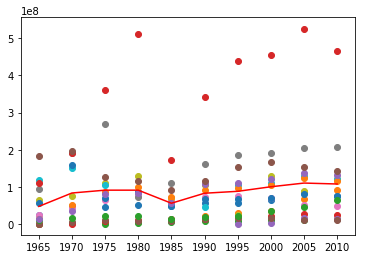

In [101]:
Produçao_Petroleo_media = Produçao_Petroleo.mean()
for pais in Produçao_Petroleo_t.columns:
    plt.scatter(x=Produçao_Petroleo_t.index, y=Produçao_Petroleo_t[pais])
plt.plot(Produçao_Petroleo_media.index,  Produçao_Petroleo_media, color="r")

In [112]:
PIB_Total = TGDP.loc[:, Anos_Estudo]
PIB_Total_t=PIB_Total.T
PIB_Total_t

GDP (constant 2000 US$),Algeria,Angola,"Congo, Rep.",Ecuador,Equatorial Guinea,Gabon,Indonesia,Iran,Iraq,Kuwait,Libya,Nigeria,Qatar,Saudi Arabia,United Arab Emirates,Venezuela
1965,1.448664e+10,NaN,7.373708e+08,4.467235e+09,NaN,1.314837e+09,2.036364e+10,2.418788e+10,NaN,NaN,NaN,1.600225e+10,NaN,NaN,NaN,5.538736e+10
1970,1.974131e+10,NaN,9.396332e+08,5.544774e+09,NaN,1.722664e+09,2.758180e+10,4.122475e+10,NaN,NaN,NaN,1.979303e+10,NaN,4.407410e+10,NaN,6.731725e+10
1975,2.614644e+10,NaN,1.383396e+09,8.418212e+09,NaN,3.873822e+09,4.017610e+10,6.612053e+10,NaN,NaN,NaN,2.594983e+10,NaN,1.100190e+11,2.989928e+10,7.783308e+10
1980,3.529123e+10,NaN,1.746409e+09,1.088244e+10,NaN,3.594320e+09,5.882127e+10,5.728671e+10,NaN,NaN,NaN,3.145174e+10,NaN,1.537236e+11,6.237074e+10,8.783109e+10
1985,4.464049e+10,7.218738e+09,2.840863e+09,1.164983e+10,1.942937e+08,4.059059e+09,7.735343e+10,6.939679e+10,NaN,NaN,NaN,2.695620e+10,NaN,1.217595e+11,5.816209e+10,8.382472e+10
1990,4.636691e+10,8.463863e+09,2.795588e+09,1.333067e+10,2.074998e+08,4.298461e+09,1.091505e+11,7.029376e+10,NaN,NaN,NaN,3.497765e+10,NaN,1.441278e+11,6.619208e+10,9.526387e+10
1995,4.696416e+10,6.698532e+09,2.857728e+09,1.521061e+10,2.899155e+08,5.002313e+09,1.593827e+11,8.307323e+10,NaN,3.432525e+10,NaN,3.954275e+10,NaN,1.659983e+11,7.967733e+10,1.128514e+11
2000,5.479006e+10,9.129180e+09,3.219894e+09,1.594164e+10,1.254223e+09,5.067839e+09,1.650210e+11,1.012865e+11,2.585711e+10,3.771801e+10,3.389660e+10,4.598345e+10,1.775989e+10,1.884419e+11,1.043374e+11,1.171476e+11
2005,6.956519e+10,1.464378e+10,3.931789e+09,2.097643e+10,4.186550e+09,5.523002e+09,2.078915e+11,1.329504e+11,1.901440e+10,5.595636e+10,4.151087e+10,6.190230e+10,2.645546e+10,2.269447e+11,1.354609e+11,1.328870e+11
2010,7.916434e+10,2.612566e+10,5.067060e+09,2.499582e+10,5.979286e+09,6.343810e+09,2.747447e+11,NaN,2.358340e+10,6.325843e+10,NaN,8.558174e+10,5.690822e+10,2.607398e+11,1.584085e+11,1.594048e+11


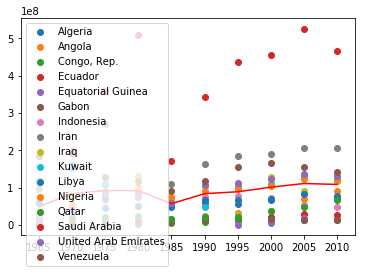

In [134]:
PIB_Total_medio = PIB_Total.mean()
for pais in PIB_Total_t.columns:
    plt.scatter(x=PIB_Total_t.index, y=PIB_Total_t[pais])
#plt.legend(PIB_Total_t.columns)
plt.plot(PIB_Total_medio.index,  PIB_Total_medio, color="r")


In [116]:
ExportInPIB = EGDP.loc[:, Anos_Estudo]
ExportInPIB_t=ExportInPIB.T
ExportInPIB_t

Exports of goods and services (% of GDP),Algeria,Angola,"Congo, Rep.",Ecuador,Equatorial Guinea,Gabon,Indonesia,Iran,Iraq,Kuwait,Libya,Nigeria,Qatar,Saudi Arabia,United Arab Emirates,Venezuela
1965,22.603944,NaN,36.008223,16.248990,42.111766,43.243243,5.527578,16.279815,NaN,67.690254,NaN,10.893449,NaN,NaN,NaN,25.815217
1970,22.072734,NaN,34.736829,15.232975,35.699518,49.720659,13.451007,19.163515,NaN,59.816819,NaN,8.407075,NaN,54.476915,NaN,20.920502
1975,33.688936,NaN,35.888078,25.962574,42.980976,49.524221,24.008846,43.141909,NaN,80.470321,NaN,18.338752,NaN,73.719011,NaN,28.828181
1980,34.338461,NaN,60.016648,24.951660,NaN,64.720195,34.178997,14.410976,NaN,78.349048,NaN,29.375174,NaN,63.546004,NaN,28.777703
1985,23.583933,35.719735,56.788216,28.491762,30.093473,62.572476,22.200731,9.388897,NaN,53.674920,NaN,16.098404,NaN,30.071110,NaN,24.118149
1990,23.443685,38.912521,53.680247,32.982323,32.152448,46.038504,25.328513,14.523923,NaN,44.938950,39.676237,43.430979,NaN,40.629130,NaN,39.450023
1995,26.194776,NaN,64.704570,25.727868,55.204200,59.386999,26.312165,21.708551,NaN,52.353956,29.176030,44.287739,44.338668,37.569916,NaN,27.107147
2000,41.175353,89.626206,80.297147,37.065394,99.455867,69.032177,40.977309,22.707458,NaN,56.473640,35.630562,53.976959,67.283359,43.652438,NaN,29.744220
2005,47.646353,86.017538,84.158173,30.904340,87.417383,64.738257,34.067267,33.056609,NaN,63.976603,66.432854,46.537439,67.338797,60.878809,67.585434,39.658653
2010,30.830405,62.413106,85.119671,32.949406,69.899376,60.285784,24.620993,NaN,NaN,60.074648,NaN,35.204351,NaN,58.088579,77.936885,28.530407


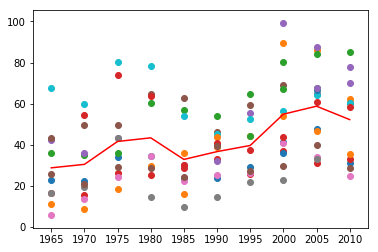

In [118]:
ExportInPIB_medio = ExportInPIB.mean()
for pais in ExportInPIB_t.columns:
    plt.scatter(x=ExportInPIB_t.index, y=ExportInPIB_t[pais])
plt.plot(ExportInPIB_medio.index,  ExportInPIB_medio, color="r")

### Conclusão:
Não necessariamente a entrada na OPEP aumenta a GDP dos países membros, mas ela aumenta a influencia da porcentagem de exportação em relação a GDP total do país. 